<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Deep Learning</center>

# Challenge S3: Redes Neuronales Profundas en Keras (DNNs)

## Objetivos

El objetivo de este challenge es optimizar una DNN capaz de distinguir entre imágenes de prendas de ropa de la base de datos Fasion MNIST.

## Punto de partida

El punto de partida se corresponde con el código que hemos visto en el worksheet:

Epoch 1/10
391/391 [==============================] - 2s 5ms/step - loss: 4.0642 - accuracy: 0.7630 - val_loss: 0.8022 - val_accuracy: 0.7977
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 0.6431 - accuracy: 0.8110 - val_loss: 0.6285 - val_accuracy: 0.8079
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 0.5130 - accuracy: 0.8327 - val_loss: 0.5593 - val_accuracy: 0.8315
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 0.4571 - accuracy: 0.8468 - val_loss: 0.5436 - val_accuracy: 0.8265
Epoch 5/10
391/391 [==============================] - 2s 5ms/step - loss: 0.4350 - accuracy: 0.8514 - val_loss: 0.4859 - val_accuracy: 0.8504
Epoch 6/10
391/391 [==============================] - 2s 5ms/step - loss: 0.4277 - accuracy: 0.8536 - val_loss: 0.5121 - val_accuracy: 0.8427
Epoch 7/10
391/391 [==============================] - 2s 5ms/step - loss: 0.4152 - accuracy: 0.8534 - val_loss: 0.4761 - val_accuracy: 0.8402
Epoch 

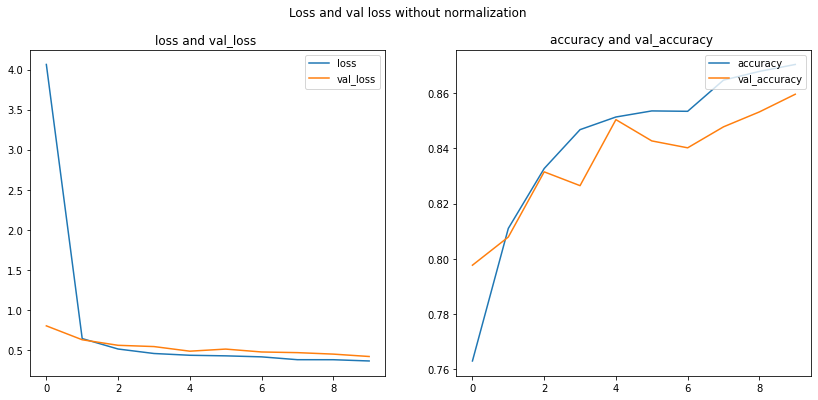

In [1]:
%matplotlib inline
#%tensorflow_version 2.x  # sólo necesaria si estamos en colab
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Otras librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importamos las capas y modelos que vamos a necesitar para este worksheet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Import Fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist

# Primeras 10000 imágenes, las utilizamos como validación
X_valid = train_images[:10000]
Y_valid = train_labels[:10000]

X_train = train_images[10000:]
Y_train = train_labels[10000:]

X_test = test_images
Y_test = test_labels

X_train = X_train.reshape(X_train.shape[0], 28*28)
X_valid = X_valid.reshape(X_valid.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')

# Quitamos la normalizacion para ver el resultado sin normalizar
#X_train = X_train / 255
#X_valid = X_valid / 255
#X_test = X_test / 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_valid = keras.utils.to_categorical(Y_valid, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, 
          batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, Y_valid))

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

history_no_normal = pd.DataFrame(history.history)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))
fig.suptitle('Loss and val loss without normalization')
ax1.set_title("loss and val_loss ")
ax1.plot(history_no_normal.loc[0:,['loss']],label='loss')
ax1.plot(history_no_normal.loc[0:,['val_loss']],label='val_loss')
ax1.legend(loc='upper right')

ax2.set_title("accuracy and val_accuracy ")
ax2.plot(history_no_normal.loc[0:,['accuracy']],label='accuracy')
ax2.plot(history_no_normal.loc[0:,['val_accuracy']],label='val_accuracy')
ax2.legend(loc='upper right')


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Capa: dense
Pesos


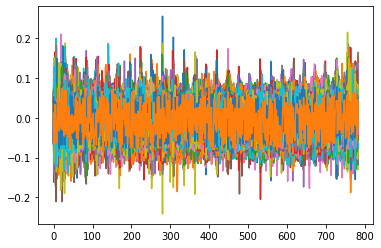

Capa: dense_1
Pesos


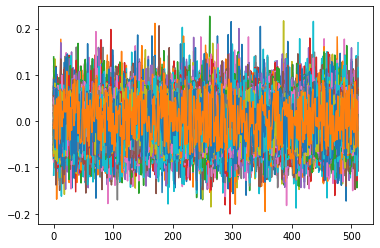

Capa: dense_2
Pesos


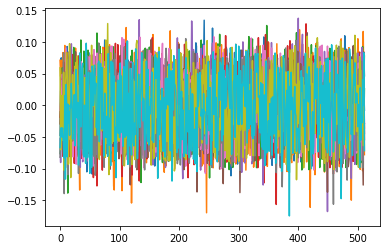

In [3]:
for lay in model.layers:
    print("Capa:",lay.name)
    print ("Pesos")
    plt.plot(lay.get_weights()[0])
    plt.show()

## Tareas

Vamos a comenzar normalizando los datos de entrada según tres criterios: escalar los valores de entrada al rango 0-1, centrar a una media aproximada de 0 y transformar los datos de entrada aproximadamente a una distribución normal de media 0 y desviación unidad (N(0,1)).

A continuación, cambiaremos el criterio de parada del entrenamiento del número máximo de iteraciones (épocas) a terminar el entrenamiento cuando se cumplan unas ciertas condiciones en un subconjunto de los datos u opcionalmente en un conjunto de validación (independiente del entrenamiento).

### Normalización 1: escalado de los valores al rango (0, 1)

A partir del código anterior, realizar las modificaciones necesarias para que los valores de las imágenes estén escalados al rango (0, 1).

In [4]:
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler

scaler_min = MinMaxScaler()
normalized_X_train = scaler_min.fit_transform(X_train)
normalized_X_valid = scaler_min.fit_transform(X_valid)
normalized_X_test = scaler_min.fit_transform(X_test)

In [19]:
normalized_X_train[500,600]

0.8745099

Epoch 1/10
391/391 [==============================] - 2s 5ms/step - loss: 0.7538 - accuracy: 0.7432 - val_loss: 0.4591 - val_accuracy: 0.8330
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 0.3736 - accuracy: 0.8656 - val_loss: 0.3577 - val_accuracy: 0.8689
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 0.3346 - accuracy: 0.8789 - val_loss: 0.3497 - val_accuracy: 0.8731
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 0.3097 - accuracy: 0.8873 - val_loss: 0.3333 - val_accuracy: 0.8764
Epoch 5/10
391/391 [==============================] - 2s 6ms/step - loss: 0.2927 - accuracy: 0.8914 - val_loss: 0.3143 - val_accuracy: 0.8846
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 0.2813 - accuracy: 0.8941 - val_loss: 0.3271 - val_accuracy: 0.8795
Epoch 7/10
391/391 [==============================] - 2s 5ms/step - loss: 0.2697 - accuracy: 0.8989 - val_loss: 0.3179 - val_accuracy: 0.8829
Epoch 

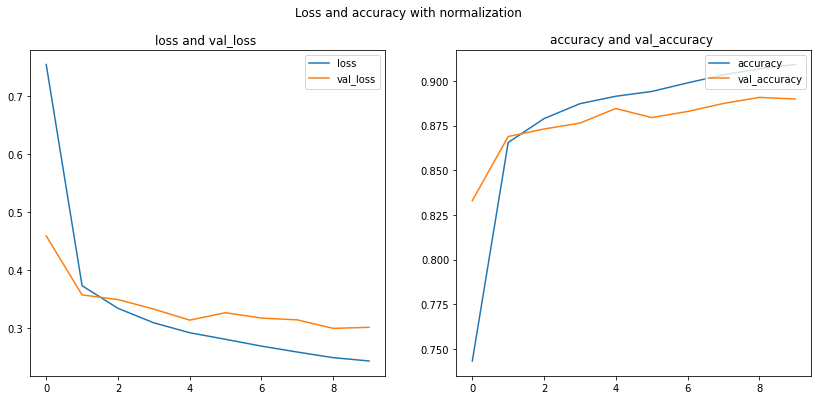

In [5]:
# Entrenamos el modelo con los datos normalizados en el rango (0,1)
history_mm = model.fit(normalized_X_train, Y_train, 
          batch_size=128, epochs=10, verbose=1, validation_data=(normalized_X_valid, Y_valid))

score = model.evaluate(normalized_X_test, Y_test, verbose=0)
print(score)

history_normal = pd.DataFrame(history_mm.history)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))
fig.suptitle('Loss and accuracy with normalization')
ax1.set_title("loss and val_loss ")
ax1.plot(history_normal.loc[0:,['loss']],label='loss')
ax1.plot(history_normal.loc[0:,['val_loss']],label='val_loss')
ax1.legend(loc='upper right')


ax2.set_title("accuracy and val_accuracy ")
ax2.plot(history_normal.loc[0:,['accuracy']],label='accuracy')
ax2.plot(history_normal.loc[0:,['val_accuracy']],label='val_accuracy')
ax2.legend(loc='upper right')


¿Ha mejorado el resultado? ¿Por qué?

In [6]:
# Ya vemos una mejora con respecto al experimento inicial sin normalizar. 
# El valor de perdida para el set de validacion es de ~0.42 (sin normalizar) versus ~0.30 (normalizado). Ademas del valor de accuracy que
# es sensiblemente mejor con los datos normalizados.
# En general, por lo que he podido leer es casi siempre una buena idea normalizar los datos,
# la razón es que el SGD ajustara los pesos de la red en proporción a la magnitud de la activación que produzcan los datos.
# Las features que tienden a producir activaciones de tamaños muy diferentes pueden dar lugar a un comportamiento de entrenamiento inestable

### Normalización 2: centrar a una media aproximada de 0 

AYUDA: Para centrar los valores a una media aproximada de 0, puedes calcular la media total y restarsela a todos los datos. Recuerda que la información de los datos de evaluación (test) no se puede utilizar, pero deben llevar el mismo procesamiento que los datos con los que se entrena la red.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler_m0 = StandardScaler(with_std=False)
scaler_X_train_m0 = scaler_m0.fit_transform(X_train)
scaler_X_valid_m0 = scaler_m0.fit_transform(X_valid)
scaler_X_test_m0 = scaler_m0.fit_transform(X_test)

In [18]:
scaler_X_train_m0[500,600]

81.82714

Epoch 1/10
391/391 [==============================] - 2s 5ms/step - loss: 34.0664 - accuracy: 0.7147 - val_loss: 1.0302 - val_accuracy: 0.7474
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 0.7618 - accuracy: 0.7752 - val_loss: 0.8146 - val_accuracy: 0.7814
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 0.5958 - accuracy: 0.8082 - val_loss: 0.7444 - val_accuracy: 0.8095
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 0.5063 - accuracy: 0.8329 - val_loss: 0.6244 - val_accuracy: 0.8355
Epoch 5/10
391/391 [==============================] - 3s 8ms/step - loss: 0.4588 - accuracy: 0.8451 - val_loss: 0.5940 - val_accuracy: 0.8440
Epoch 6/10
391/391 [==============================] - 2s 5ms/step - loss: 0.4111 - accuracy: 0.8570 - val_loss: 0.6137 - val_accuracy: 0.8502
Epoch 7/10
391/391 [==============================] - 2s 6ms/step - loss: 0.3877 - accuracy: 0.8655 - val_loss: 0.5596 - val_accuracy: 0.8545
Epoch

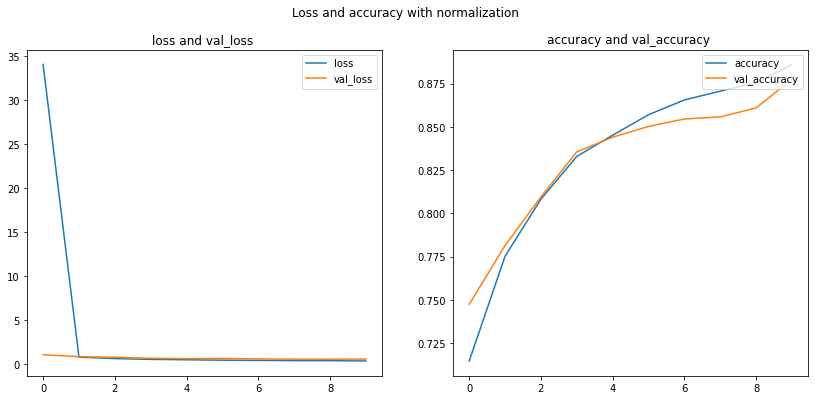

In [8]:
history_m0 = model.fit(scaler_X_train_m0, Y_train, 
          batch_size=128, epochs=10, verbose=1, validation_data=(scaler_X_valid_m0, Y_valid))

score = model.evaluate(scaler_X_test_m0, Y_test, verbose=0)
print(score)

history_mean0 = pd.DataFrame(history_m0.history)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))
fig.suptitle('Loss and accuracy with normalization')
ax1.set_title("loss and val_loss ")
ax1.plot(history_mean0.loc[0:,['loss']],label='loss')
ax1.plot(history_mean0.loc[0:,['val_loss']],label='val_loss')
ax1.legend(loc='upper right')


ax2.set_title("accuracy and val_accuracy ")
ax2.plot(history_mean0.loc[0:,['accuracy']],label='accuracy')
ax2.plot(history_mean0.loc[0:,['val_accuracy']],label='val_accuracy')
ax2.legend(loc='upper right')

### Normalización 3: distribución normal de media 0 y desviación stándard 1 (estandarización N(0,1))

AYUDA: Para estandarizar los valores a una distribución aproximadamente normal N(0, 1), puedes calcular la media y la desviación total y aplicar la normalización: x\_norm = (x - media)/desviacion. 

Recuerda que la información de los datos de evaluación (test) no se puede utilizar, pero deben llevar el mismo procesamiento que los datos con los que se entrena la red.


In [9]:
############## Si al ejecutar el Kernel se bloquea, 
############## utiliza estas líneas para permitir la 
############## duplicación de librerías
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
##############
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()
scaler_X_train = scaler_std.fit_transform(X_train)
scaler_X_valid = scaler_std.fit_transform(X_valid)
scaler_X_test = scaler_std.fit_transform(X_test)

Epoch 1/10
391/391 [==============================] - 2s 5ms/step - loss: 0.6290 - accuracy: 0.7900 - val_loss: 0.4312 - val_accuracy: 0.8440
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 0.3601 - accuracy: 0.8677 - val_loss: 0.3836 - val_accuracy: 0.8606
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 0.3216 - accuracy: 0.8826 - val_loss: 0.3632 - val_accuracy: 0.8706
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 0.2977 - accuracy: 0.8906 - val_loss: 0.3454 - val_accuracy: 0.8764
Epoch 5/10
391/391 [==============================] - 2s 5ms/step - loss: 0.2798 - accuracy: 0.8977 - val_loss: 0.3372 - val_accuracy: 0.8800
Epoch 6/10
391/391 [==============================] - 2s 5ms/step - loss: 0.2637 - accuracy: 0.9029 - val_loss: 0.3244 - val_accuracy: 0.8867
Epoch 7/10
391/391 [==============================] - 2s 5ms/step - loss: 0.2498 - accuracy: 0.9073 - val_loss: 0.3285 - val_accuracy: 0.8842
Epoch 

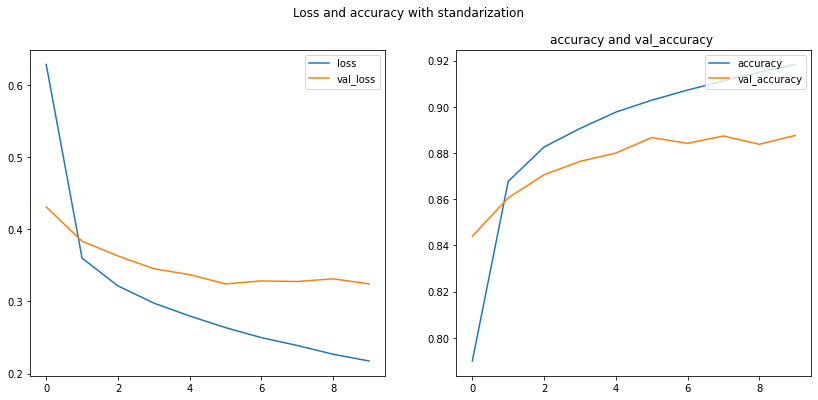

In [10]:
history_standard = model.fit(scaler_X_train, Y_train, 
          batch_size=128, epochs=10, verbose=1, validation_data=(scaler_X_valid, Y_valid))

score = model.evaluate(scaler_X_test, Y_test, verbose=0)
print(score)

history_std = pd.DataFrame(history_standard.history)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))
fig.suptitle('Loss and accuracy with standarization')
ax1.plot(history_std.loc[0:,['loss']],label='loss')
ax1.plot(history_std.loc[0:,['val_loss']],label='val_loss')
ax1.legend(loc='upper right')


ax2.set_title("accuracy and val_accuracy ")
ax2.plot(history_std.loc[0:,['accuracy']],label='accuracy')
ax2.plot(history_std.loc[0:,['val_accuracy']],label='val_accuracy')
ax2.legend(loc='upper right')



¿Ha mejorado el resultado con estas normalizaciones? ¿Por qué? ¿Con cuál se obtiene el mejor resultado?

In [11]:
# En general normalizar ha mejorado los resultados comparado con los datos sin normalizar
# A tenor de los resultados y fijandonos en la metrica de la funcion de perdida en el set de validacion, la normalizacion (0,1)
# ha obtenido los mejores resultados.

### Ajuste de la tasa de aprendizaje para optimizar el rendimiento de la red

Muchas veces, cuando la función de coste llega a una zona cerca del mínimo, la tasa de aprendizaje es muy grande para acercarse lo más posible a ese mínimo. Por eso, una de las formas de modificar ese valor durante el entrenamiento es llegar a un punto donde no vemos mejora en rendimiento en nuestro conjunto de validación, y empezar a reducir a la mitad el valor de nuestra tasa de aprendizaje. 

Para ello, podemos utilizar uno de los Callbacks de Keras llamado: ReduceLROnPlateau. Puedes encontrar la información sobre él en el siguiente enlace: https://keras.io/callbacks/#reducelronplateau

Es posible que tengas que aumentar las iteraciones máximas para llegar a un caso en el que lleguemos a aplicar este callback, o ver mejor su influencia.

Puedes empezar con el código anterior, con una paciencia de 2 iteraciones y una reducción del 50% del valor de la tasa de aprendizaje.

Epoch 1/30
391/391 [==============================] - 3s 7ms/step - loss: 0.5014 - accuracy: 0.8187 - val_loss: 0.4033 - val_accuracy: 0.8520
Epoch 2/30
391/391 [==============================] - 3s 7ms/step - loss: 0.3634 - accuracy: 0.8652 - val_loss: 0.3818 - val_accuracy: 0.8595
Epoch 3/30
391/391 [==============================] - 3s 8ms/step - loss: 0.3277 - accuracy: 0.8791 - val_loss: 0.3363 - val_accuracy: 0.8771
Epoch 4/30
391/391 [==============================] - 3s 8ms/step - loss: 0.3018 - accuracy: 0.8875 - val_loss: 0.3120 - val_accuracy: 0.8837
Epoch 5/30
391/391 [==============================] - 3s 8ms/step - loss: 0.2783 - accuracy: 0.8956 - val_loss: 0.3588 - val_accuracy: 0.8719
Epoch 6/30
391/391 [==============================] - 3s 7ms/step - loss: 0.2650 - accuracy: 0.9010 - val_loss: 0.3203 - val_accuracy: 0.8821

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/30
391/391 [==============================] - 3s 7ms/step -

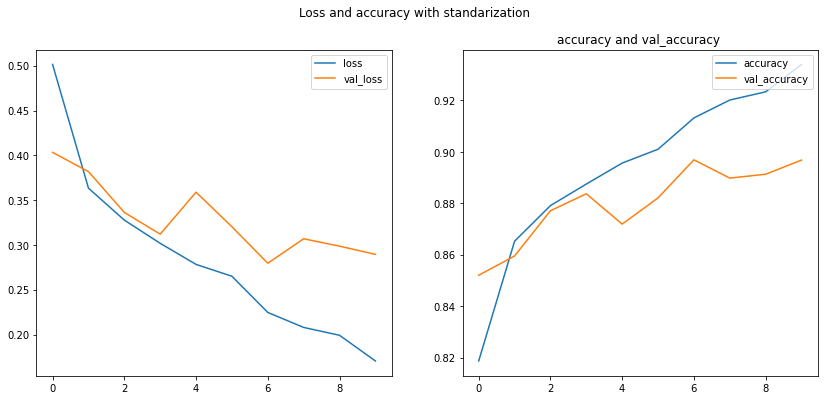

In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=2,verbose=1)

early_stopping = EarlyStopping(
                    monitor='val_loss',
                    min_delta=0.001,
                    patience = 3,
                    verbose=2,
                    restore_best_weights=True,
)

# En este modelo final usamos los datos de entrada normalizados con standard Scaler.
# Se agregan capas de dropout (a modo de experimento) a fin de evitar el overfitting. Durante el entrenamiento, la red puede aprender
# patrones ficticios o espureos. Para reconocer esos patrones, la red suele basarse en combinaciones muy especificas de pesos(una especie
# de conspiracion de pesos). Quitando alguno de esos pesos deshacemos la "conspiracion". Esa es un poco la idea de dropout. 
# Aleatoriamente remover un % de de esos pesos (neuronas) con el fin de que sea mucho mas dificil que la red aprenda esos 
# patrones ficticios / espurios.

# En general, es una buena idea normalizar los datos,
# la razón es que el SGD desplazará los pesos de la red en proporción a la magnitud de la activación que produzcan los datos.
# Las features que tienden a producir activaciones de tamaños muy diferentes pueden dar lugar a un comportamiento de entrenamiento inestable.
# Por lo tanto es bueno normalizar los datos antes de meterlos en la red y ademas existe la opcion de normalizarlos dentro de la red,
# mediante el uso de BatchNormalization (tambien se ha probado a modo de experimento)
# https://keras.io/api/layers/normalization_layers/batch_normalization/

model_final = Sequential()
model_final.add(Dense(512, activation='relu', input_shape=(28*28,)))
#model_final.add(BatchNormalization())
#model.add(Dropout(0.4))
model_final.add(Dense(512, activation='relu'))
model_final.add(Dense(512, activation='relu'))
#model_final.add(BatchNormalization())
#model.add(Dropout(0.4))
model_final.add(Dense(10, activation='softmax'))

model_final.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

final_model = model_final.fit(normalized_X_train, Y_train, 
          batch_size=128, epochs=30, verbose=1, validation_data=(normalized_X_valid, Y_valid),callbacks=[reduce_lr,early_stopping])

weights = model_final.get_weights()
score = model_final.evaluate(normalized_X_test, Y_test, verbose=1)
print(score)
#print(weights)
history_final = pd.DataFrame(final_model.history)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))
fig.suptitle('Loss and accuracy with standarization')
ax1.plot(history_final.loc[0:,['loss']],label='loss')
ax1.plot(history_final.loc[0:,['val_loss']],label='val_loss')
ax1.legend(loc='upper right')


ax2.set_title("accuracy and val_accuracy ")
ax2.plot(history_final.loc[0:,['accuracy']],label='accuracy')
ax2.plot(history_final.loc[0:,['val_accuracy']],label='val_accuracy')
ax2.legend(loc='upper right')


<AxesSubplot:>

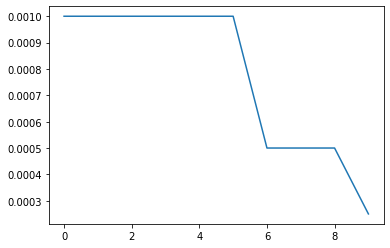

In [13]:
# Visualizacion del lerning rate
history_final['lr'].plot()

In [14]:
# En el epoch 6 obtenemos el mejor valor de la metrica que estamos trackeando ('val_loss') y con EarlyStopping restauraremos
# los valores de los pesos en ese momento.
history_final

,loss,accuracy,val_loss,val_accuracy,lr
0,0.501419,0.81866,0.403337,0.8520,0.00100
1,0.363360,0.86524,0.381827,0.8595,0.00100
2,0.327700,0.87910,0.336288,0.8771,0.00100
3,0.301792,0.88748,0.312044,0.8837,0.00100
4,0.278265,0.89564,0.358848,0.8719,0.00100
5,0.265042,0.90102,0.320301,0.8821,0.00100
6,0.224638,0.91320,0.279568,0.8969,0.00050
7,0.207927,0.92016,0.306883,0.8898,0.00050
8,0.199163,0.92336,0.298609,0.8913,0.00050
9,0.170487,0.93400,0.289495,0.8968,0.00025


In [15]:
model_final.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


Capa: dense_3
Pesos


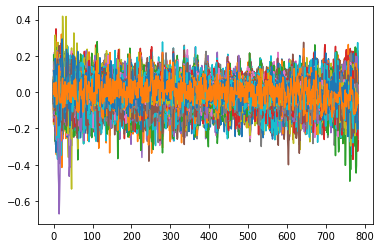

Capa: dense_4
Pesos


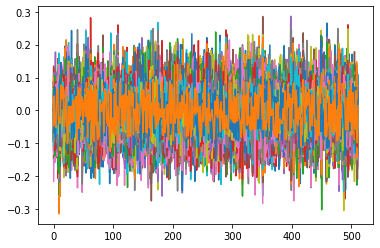

Capa: dense_5
Pesos


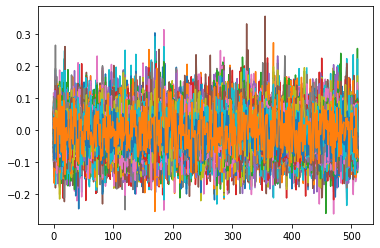

Capa: dense_6
Pesos


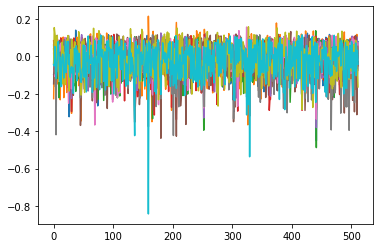

In [16]:
for lay in model_final.layers:
    print ("Capa:",lay.name)
    print ("Pesos")
    plt.plot(lay.get_weights()[0])
    plt.show()

¿Mejora ahora el resultado?

In [17]:
# Se puede ver el efecto de como al ir ajustando el lr , el val_loss en este caso va disminuyendo, con lo cual el resultado ha mejorado.
# En mi caso he usado otro callback de StopEarly con restauracion de los mejores pesos conseguidos y un min_delta = 0.0001. 